In [1]:
import numpy as np
import matplotlib.pyplot as plt

from joblib import Parallel, delayed

import multiprocessing
num_cores = multiprocessing.cpu_count()

from scipy.integrate import quad

%matplotlib inline

In [2]:
import TA_gamma as tat

In [3]:
Uinf = 1

In [4]:
c = 1

p = 0.3
m = 0.02


In [5]:
ξ_pl = np.linspace(0,c,num=250,endpoint=True)
y_pl = np.zeros_like(ξ_pl)

for ii in range(len(ξ_pl)):
    if ξ_pl[ii] <= p*c:
        y_pl[ii] = m*ξ_pl[ii]/p**2*(2*p-ξ_pl[ii]/c)
    else:
        y_pl[ii] = m*(c - ξ_pl[ii])/(1-p)**2*(1 + ξ_pl[ii]/c - 2*p)

In [6]:
α_th = tat.naca_4(m,p,c,0,0)
α_th

-0.011386886003404676

In [7]:
α = np.deg2rad(0.)

In [8]:
n = 35
A_fs = tat.naca_4(m,p,c,n,α)

In [9]:
θ_af = np.logspace(-4,0,num=1500,endpoint=True)*np.pi
#θ_eps = np.linspace(5e-2,np.pi,num=200,endpoint=True)
ξ_af = c/2*(1-np.cos(θ_af))
#x_eps = c/2*(1-np.cos(θ))

In [10]:
γ_fs1 = tat.γ(θ_af,A_fs, Uinf)

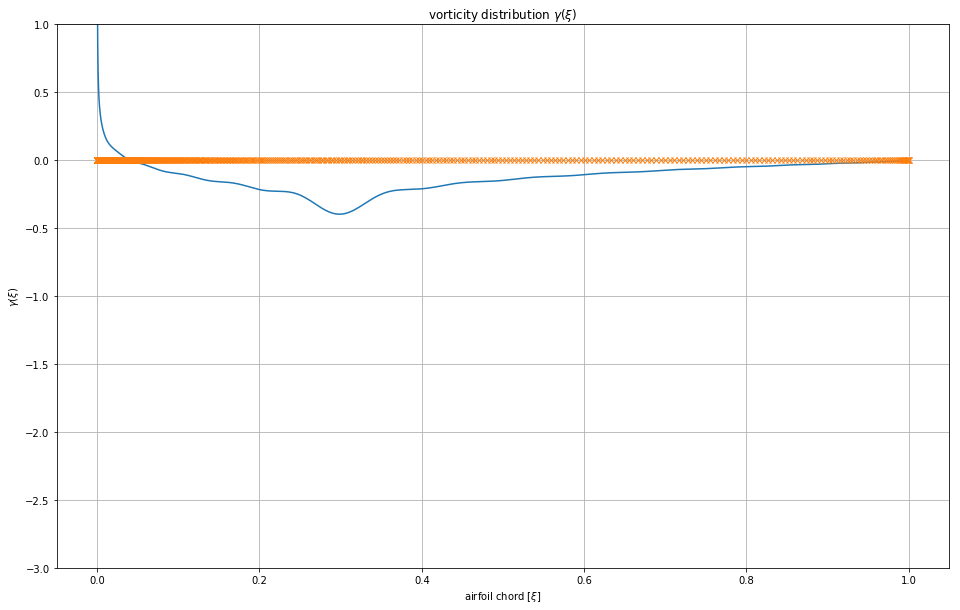

In [11]:
plt.figure(figsize=(16,10))

plt.plot(ξ_af,γ_fs1,label=r'$\gamma$')
if np.abs(γ_fs1[0]) > 3:
    plt.ylim([-3,1])
#plt.xlim([0.0,0.02])
plt.plot(ξ_af, np.zeros_like(ξ_af),'x')

#for ii in range(len(A_fs)):
#    if ii == 0:
#        plt.plot(ξ_af,-2*Uinf*A_fs[ii]*((1+np.cos(θ_af))/np.sin(θ_af)),label=r'$A_'+str(ii)+'$')
#    else:
#        plt.plot(ξ_af,-2*Uinf*A_fs[ii]*(np.sin(ii*θ_af)),label=r'$A_{'+str(ii)+'}$')
    

plt.xlabel(r'airfoil chord $[\xi]$')
plt.ylabel(r'$\gamma(\xi)$')
plt.title(r'vorticity distribution $\gamma(\xi)$')
#plt.legend()
plt.grid();

In [13]:
A_fs

array([ -1.13868860e-02,   9.89146486e-02,   4.97386494e-02,
        -4.08628392e-03,  -1.89344705e-02,  -8.50924020e-03,
         6.53042027e-03,   1.00794888e-02,   2.00871688e-03,
        -6.32317179e-03,  -6.03943934e-03,   8.16034278e-04,
         5.59089651e-03,   3.39168858e-03,  -2.28004767e-03,
        -4.61814872e-03,  -1.44750789e-03,   2.98377823e-03,
         3.52591515e-03,  -7.24500601e-06,  -3.17494650e-03,
        -2.40256844e-03,   1.05579912e-03,   2.99714432e-03,
         1.32365018e-03,  -1.74198391e-03,  -2.55773454e-03,
        -3.53568015e-04,   2.10187714e-03,   1.94929397e-03,
        -4.56463061e-04,  -2.17574229e-03,  -1.25562497e-03,
         1.07079258e-03,   2.01173413e-03,   5.51900322e-04])

In [14]:
xx = np.linspace(-1, 2, 102)
yy = np.linspace(-1, 1, 102)
xw, yw = np.meshgrid(xx, yy)


In [15]:
def int_γ_u(x,y,A,Uinf,c):
    return quad(tat.du,0,c,args=(x,y,A,Uinf,c))[0]

def int_γ_v(x,y,A,Uinf,c):
    return quad(tat.dv,0,c,args=(x,y,A,Uinf,c))[0]

In [16]:
nx, ny = xw.shape

uw = np.zeros_like(xw)
vw = np.zeros_like(xw)

#for jj in range(ny):
#    for ii in range(nx):
        #uw[ii,jj] = quad(tat.du,0,c,args=(xw[ii,jj],yw[ii,jj],A_fs,Uinf,c))[0]
        #vw[ii,jj] = quad(tat.dv,0,c,args=(xw[ii,jj],yw[ii,jj],A_fs,Uinf,c))[0]
        # uw[ii,jj] = int_γ_u(xw[ii,jj],yw[ii,jj],A_fs,Uinf,c)
        # vw[ii,jj] = int_γ_v(xw[ii,jj],yw[ii,jj],A_fs,Uinf,c)
uw = Parallel(n_jobs=num_cores)(delayed(int_γ_u)(xw[ii,jj],yw[ii,jj],A_fs,Uinf,c) for jj in range(ny) for ii in range(nx))
vw = Parallel(n_jobs=num_cores)(delayed(int_γ_v)(xw[ii,jj],yw[ii,jj],A_fs,Uinf,c) for jj in range(ny) for ii in range(nx))

/home/claudio/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/home/claudio/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/home/claudio/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)
/home/claudio/anaconda2/envs/py36/lib/python3.6/site-packages/scipy/integrate/quadpack.py:364: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


In [17]:
uw = np.array(uw).reshape(nx,ny,order='F')
vw = np.array(vw).reshape(nx,ny,order='F')

uw += Uinf*np.cos(α)
vw += Uinf*np.sin(α)

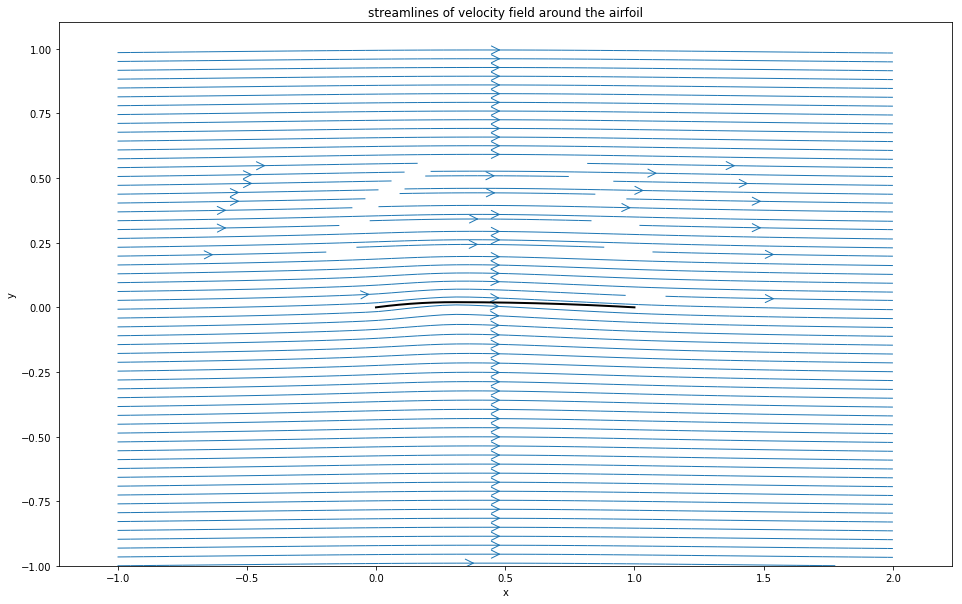

In [18]:
plt.figure(figsize=(16,10))
plt.streamplot(xw, yw, uw, vw, density=2, linewidth=1, arrowsize=2, arrowstyle='->')
plt.plot(ξ_pl,y_pl,'k',lw=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('streamlines of velocity field around the airfoil')
plt.axis('equal');

In [19]:
Cp = np.zeros_like(xw)
Cp = 1 - (uw**2+vw**2)/Uinf*2

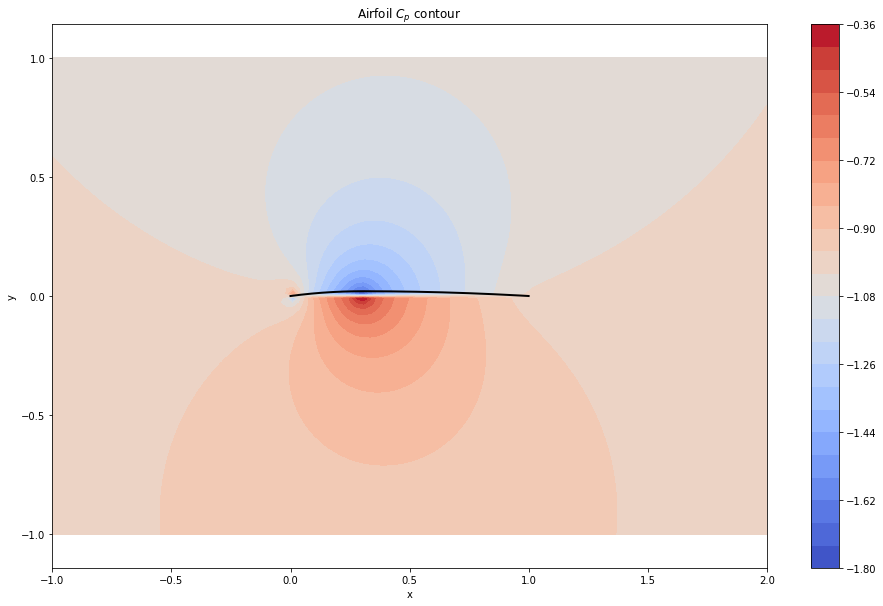

In [20]:
plt.figure(figsize=(16,10))
cm =plt.contourf(xw,yw,Cp,25,cmap='coolwarm')
plt.colorbar(cm)
plt.title('Airfoil $C_p$ contour')
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.plot(ξ_pl,y_pl,'k',lw=2)
plt.axis('equal');

In [119]:
#Parallel(n_jobs=nu)(delayed(self.compute_tf)(i, j) for j in column_list for i in row_list)